In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [5]:
#데이터 준비
X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

# Ensemble Method

### VotingClassifier
여러 개의 클래스가 투표

### Bagging
훈련 샘플을 여러 번(중복) 사용하여 훈련
• Randomforest : Bagging + DecisionTree
• ExtraTree

### Boosting
• Adaboosting
• Gradient Boosting
• XGBoost

비교적 편향은 비슷히지만, 분산은 감소한다.

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [7]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=42)

# VotingClassifier
직접투표(Hard) :default
간접투표(Soft) : 확률추정 predict_proba, 개별분류기의 예측을 평균내에서 가장 확률이 높은 클래스를 예측한다.

In [8]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)], voting='hard')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))])

### 이 부분에 대한 생각
의외로 이 부분은 내 코드 상에서 hard와 soft의 차이가 크게 없음을 확인.

In [9]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [10]:
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('dt', dt_clf)], voting='soft')
voting_clf.fit(X_train, Y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))],
                 voting='soft')

In [11]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, dt_clf, voting_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
DecisionTreeClassifier 0.896
VotingClassifier 0.904


In [12]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  oob_score=True, random_state=40)

### OOB(Out-of-bag)평가
배깅에서 어떤 데이터는 이용되지 않을 수 있음
• 일반적으로 훈련할 때 사용하는 데이터는 63% 정도
• 나머지 37%는 oob(out of bag)

In [14]:
#obb-score 출력
print("oob_score:",bag_clf.oob_score_)
#decisiontree bagging
y_pred = bag_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

oob_score: 0.8986666666666666


0.904

### XGBoost
• Gradient Boosting을 최적화한 모델
• 빠른 속도, 확장성, 이식성을 가지고 있음.

In [17]:
import xgboost
xgb_clf = xgboost.XGBClassifier(n_estimators=100, max_depth=3, random_state=42, eval_metric='logloss')
xgb_clf.fit(X_train, Y_train)
y_pred = xgb_clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.904

### LinearSVC에서 결과

Text(0.5, 0, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


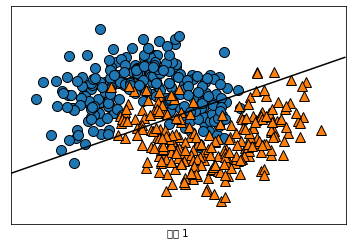

In [18]:
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

linear_svm = LinearSVC().fit(X, Y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel("특성 0")
plt.xlabel("특성 1")

# 3D화를 위한 제반 작업 (이 부분은 책을 활용했다.)

Text(0.5, 0, '특성1 ** 2')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


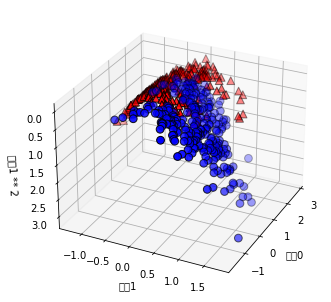

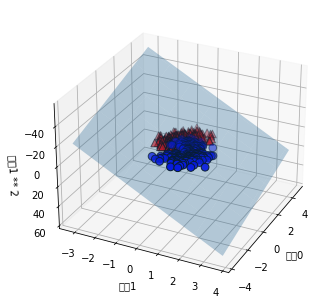

In [21]:
import numpy as np
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = Y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1") 
ax.set_zlabel("특성1 ** 2")
linear_svm_3d = LinearSVC().fit(X_new, Y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

# 위 3D를 2차원화
이 부분이 교수님의 ppt와 많이 다른 점을 확인했다.

Text(0.5, 0, '특성 1')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


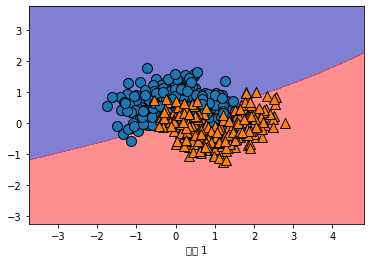

In [22]:
import numpy as np
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel("특성 0")
plt.xlabel("특성 1")

In [23]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target, random_state=0)

svc = SVC()
svc.fit(X_train, Y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train, Y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test, Y_test)))

훈련 세트 점수 : 0.904
테스트 세트 점수 : 0.937


### SVC(Support Vector Classfier)

In [24]:
# 훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)
# 훈련 데이터에 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train, Y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train, Y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test, Y_test)))

훈련 세트 점수 : 0.904
테스트 세트 점수 : 0.937


### 규제매개변수에 대한 변화
이를 통해서 작아질수록 제약이 커서 오히려 점수가 떨어지는 모습을 볼 수 있다.

In [26]:
svc = SVC(C = 1000)
svc.fit(X_train, Y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train, Y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test, Y_test)))

훈련 세트 점수 : 0.958
테스트 세트 점수 : 0.951


In [28]:
svc = SVC(C = 100)
svc.fit(X_train, Y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train, Y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test, Y_test)))

훈련 세트 점수 : 0.941
테스트 세트 점수 : 0.944


In [29]:
svc = SVC(C = 10)
svc.fit(X_train, Y_train)

print("훈련 세트 점수 : {:.3f}".format(svc.score(X_train, Y_train)))
print("테스트 세트 점수 : {:.3f}".format(svc.score(X_test, Y_test)))

훈련 세트 점수 : 0.915
테스트 세트 점수 : 0.937


## 좋은 모델이란 무엇일까...?

• 좋은 모델 : Supprt vector 로 만들어지는 마진을 크게 해서 경계를 확실하게 만들기

• 하드 마진 분류(Hard Margin Classification): 모든 샘플이 도로 바깥쪽으로 올바르게 분류되어 있는 것으로, 데이터가 선형적으로 구분되어 있어야 하며, 이상치에 민감함

• 소프트 마진 분류(Soft Margin Classification): 라지 마진 vs. 마진오류의 균형
- 라지마진(Large Margin) : 도로의 폭을 가능한 한 넓게 유지하는 것
- 마진 오류(margin violation) : 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우

• C 하이퍼 파라미터 : C값을 줄이면 도로의 폭이 넓어지지만, 마진 오류도 커짐

# 신경망

### MLP(Multylayer Perception)
▶ 다층 퍼셉트론
ŷ = w[0] * x[0] + w[1] * x[1] + … + w[p] * x[p] + b
ŷ : x[0]에서 x[p]까지의 입력 특성과 w[0]에서 w[p]까지 학습된 계수의 가중치 합

▶ 가중치 만드는 단계가 반복
▶ 은닉 단계를 계산하고
▶ 최종결과 산출에 가중치합 계산

이 방식은 딥러닝에서도 쓰이는 기초 중 기초!!

아래 코드의 경우도 ppt랑 다른 결과가 나왔다. (나의 코드가 더 높게 나온 편)

In [32]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, Y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, Y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


아래 코드는 평균을 0으로 분산을 1로 해놓고 계싼했다.

In [33]:
# 훈련 세트에서 특성별 평균 계산
mean_on_training = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

# 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
X_train_scaled = (X_train - mean_on_training) / std_on_train
# 훈련 데이터에 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1
X_test_scaled = (X_test - mean_on_training) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, Y_train)
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled, Y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, Y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 반복 횟수와 alpha 증가 

In [34]:
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, Y_train)
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled, Y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, Y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.97


In [35]:
mlp = MLPClassifier(max_iter = 1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train_scaled, Y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, Y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97
